In [30]:
import snh as snh
import copy

# Create a new instance of the simulator
#           (time, time step)
sim = snh.Sim(1e-3, 1e-9)

# Create the components you want in the circuit
#                                   (f, Vpp, duty)
my_square_wave = sim.gen_square_wave(7.5e3, 1, 0.75)
my_filter = snh.Chevy1_LPF(fp=35e3, fa=2*35e3, Ap=1, Aa=40)
my_zoh = snh.ZOH(f_sample=1e5, sim=sim)
my_switch = snh.Switch(f_sample=1e5, sim=sim)
my_recovery_filter = copy.deepcopy(my_filter)

In [31]:
# Connect everything
sim.makeCircuit({
    'square_wave': my_square_wave,
    'filter': my_filter,
    'zoh': my_zoh,
    'switch': my_switch,
    'recovery_filter': my_recovery_filter
})

In [32]:
# SIMULATE
curr_in_wave = []
curr_out_wave = []
sim.traces = {}
for k,v in sim.components.items():
    print(f"'{k}'".ljust(20), v)    


'square_wave'        [1. 1. 1. ... 1. 1. 1.]
'filter'             <snh.Chevy1_LPF object at 0x0000022D074681A0>
'zoh'                <snh.ZOH object at 0x0000022D0746A2D0>
'switch'             <snh.Switch object at 0x0000022D1DBD7FE0>
'recovery_filter'    <snh.Chevy1_LPF object at 0x0000022D07469550>


<class 'numpy.ndarray'>


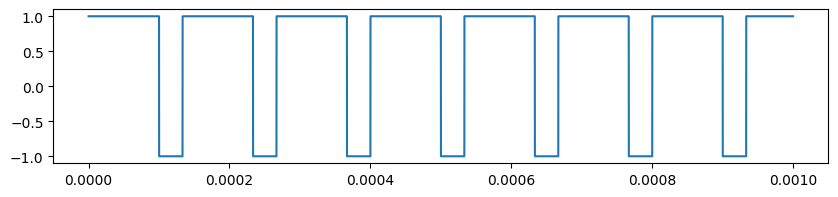

In [33]:
import matplotlib.pyplot as plt

time = sim.time_array
wave = sim.components['square_wave']

print(type(wave))
plt.figure(figsize=(10, 2))
plt.plot(time, wave)

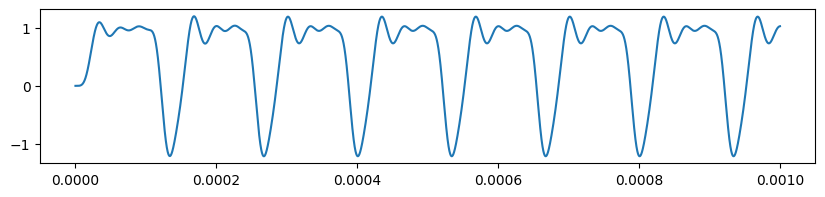

In [34]:
faa = sim.components['filter']
fr = sim.components['recovery_filter']
wave1 = faa.apply(wave, time)

plt.figure(figsize=(10, 2))
plt.plot(time, wave1)

(0.0, 0.0005)

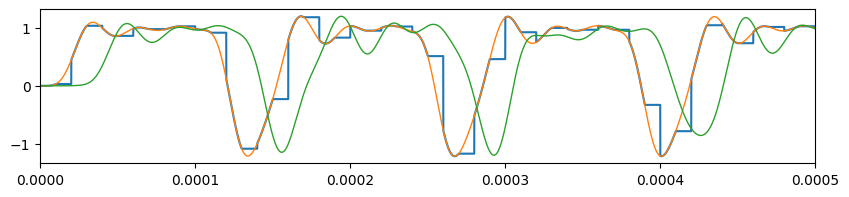

In [35]:
zoh = sim.components['zoh']
wave2 = zoh.apply(wave1, time)

plt.figure(figsize=(10, 2))
plt.plot(time, wave2, lw=1.5)
plt.plot(time, wave1, lw=1)
plt.plot(time, fr.apply(wave2, time), lw=1)
plt.xlim(0, time[len(time)//2])


(0.0, 0.0005)

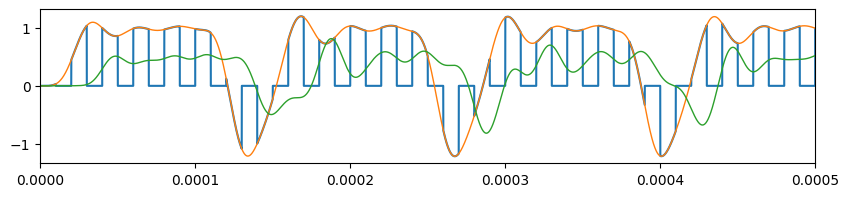

In [36]:
switch = sim.components['switch']
wave2b = switch.apply(wave1, time)

plt.figure(figsize=(10, 2))
plt.plot(time, wave2b, lw=1.5)
plt.plot(time, wave1, lw=1)
plt.plot(time, fr.apply(wave2b, time), lw=1)
plt.xlim(0, time[len(time)//2])